In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import matplotlib
#nltk.download('punkt')
#commenting to avoid downloading multiple times

import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from wordcloud import WordCloud
from PIL import Image

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
# encoding?

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1113,ham,"No I'm good for the movie, is it ok if I leave...",NaN,NaN,NaN
967,ham,What do u want when i come back?.a beautiful n...,NaN,NaN,NaN
3240,ham,Ok i've sent u da latest version of da project.,NaN,NaN,NaN
5017,ham,Babe ! What are you doing ? Where are you ? Wh...,NaN,NaN,NaN
1659,ham,"Yeah, where's your class at?",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3256,ham,"No, but you told me you were going, before you..."
4009,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...
4081,ham,No no. I will check all rooms befor activities
602,ham,Speaking of does he have any cash yet?
2899,ham,Come aftr &lt;DECIMAL&gt; ..now i m cleaning ...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2424,ham,Oh k k:)but he is not a big hitter.anyway good
5489,ham,Oh thanks a lot..i already bought 2 eggs ..
4229,ham,And several to you sir.
5150,ham,Happy new year to u and ur family...may this n...
3306,ham,Set a place for me in your heart and not in yo...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 2. EDA

In [17]:
df['target'].value_counts()

#0 - ham;    1 - spam

0    4516
1     653
Name: target, dtype: int64

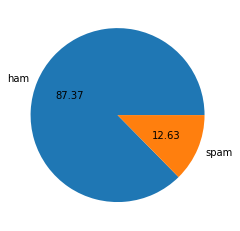

In [18]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
# data is imbalanced

In [20]:
#no of chars
df['no of chars'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,no of chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#no of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [23]:
df['no of words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,no of chars,no of words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#no of sentences
df['no of sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,no of chars,no of words,no of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['no of chars','no of words','no of sentences']].describe()

,no of chars,no of words,no of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#seperately for ham and spam

#ham
df[df['target'] == 0][['no of chars', 'no of words', 'no of sentences']].describe()

,no of chars,no of words,no of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam
df[df['target'] == 1][['no of chars', 'no of words', 'no of sentences']].describe()

,no of chars,no of words,no of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='no of chars', ylabel='Count'>

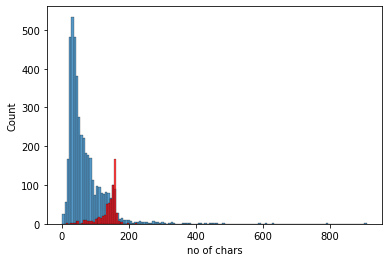

In [30]:
sns.histplot(df[df['target']==0]['no of chars'])
sns.histplot(df[df['target']==1]['no of chars'],color='red')

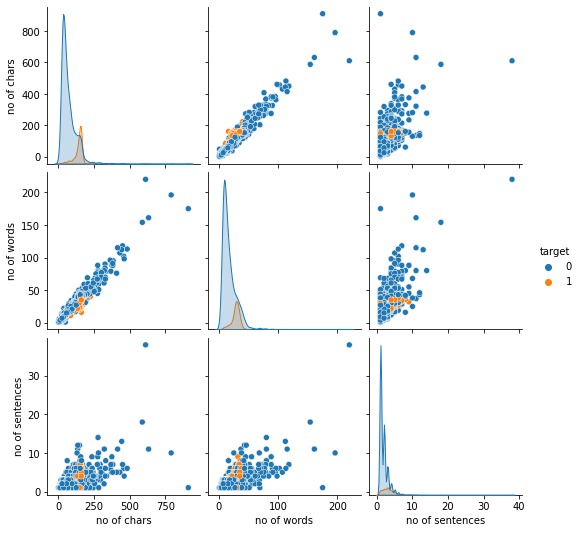

In [31]:
sns.pairplot(df,hue='target')

# for feature1 vs feature1 graph, frequency is plotted on the y axis

<AxesSubplot:>

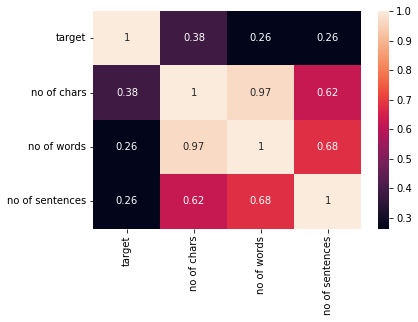

In [32]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [33]:
def transform_text(text):
    text = text.lower() #lowercase
    text = nltk.word_tokenize(text) #tokenization
    
    y=[] 
    for i in text:
        if i.isalnum():
            y.append(i)  #removing spl chars
    
    text = y[:]
    #cloning y as text
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)  #removing stopwords and punctuation
    
    text = y[:] 
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) #stemming
        
    return " ".join(y) 
    #just return why would return each word 
    #as a seperate string in an array of strings

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)

In [35]:
df.head()

,target,text,no of chars,no of words,no of sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [37]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

# https://github.com/amueller/word_cloud/issues/729

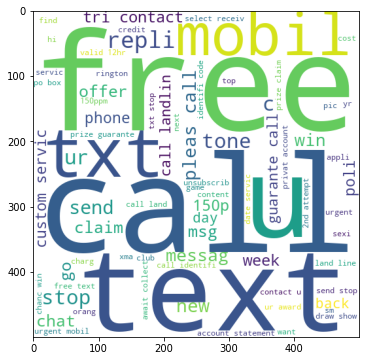

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [39]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

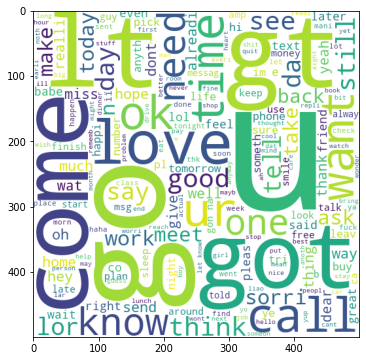

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [41]:
df.head()

,target,text,no of chars,no of words,no of sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

In [44]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\kosik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


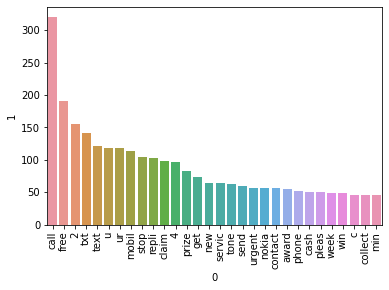

In [45]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

35404

C:\Users\kosik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


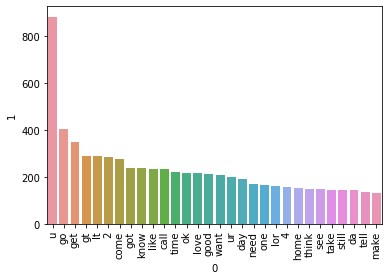

In [48]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#  4. Model Building 

In [49]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [50]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [51]:
X.shape

(5169, 6708)

In [52]:
y = df['target'].values

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [57]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
gnb.fit(X_train,y_train)
y_predG = gnb.predict(X_test)
print(accuracy_score(y_test,y_predG))
print(confusion_matrix(y_test,y_predG))
print(precision_score(y_test,y_predG))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [59]:
mnb.fit(X_train,y_train)
y_predM = mnb.predict(X_test)
print(accuracy_score(y_test,y_predM))
print(confusion_matrix(y_test,y_predM))
print(precision_score(y_test,y_predM))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [60]:
bnb.fit(X_train,y_train)
y_predB = bnb.predict(X_test)
print(accuracy_score(y_test,y_predB))
print(confusion_matrix(y_test,y_predB))
print(precision_score(y_test,y_predB))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [61]:
#tfidf

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [63]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
gnb.fit(X_train,y_train)
y_predG = gnb.predict(X_test)
print(accuracy_score(y_test,y_predG))
print(confusion_matrix(y_test,y_predG))
print(precision_score(y_test,y_predG))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [66]:
mnb.fit(X_train,y_train)
y_predM = mnb.predict(X_test)
print(accuracy_score(y_test,y_predM))
print(confusion_matrix(y_test,y_predM))
print(precision_score(y_test,y_predM))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_predB = bnb.predict(X_test)
print(accuracy_score(y_test,y_predB))
print(confusion_matrix(y_test,y_predB))
print(precision_score(y_test,y_predB))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In imbalanced data , Precision matters more than accuracy.
'tfidf -> mnb' is chosen since accuray is 100%. 
No false positive, i.e No ham is classified as spam

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [70]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc,  
    'BgC': bc, 
    'GBDT':gbdt,
}

In [71]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [72]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239


In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [74]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
0,SVC,0.972921,0.974138
4,LR,0.951644,0.940000
7,GBDT,0.952611,0.923810
6,BgC,0.958414,0.862595
3,DT,0.936170,0.846154


In [75]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

#melts the df with Accuracy and Precision in the same column
#so that we can plot them on X axis with against their value on Y axis

In [76]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,SVC,Accuracy,0.972921
4,LR,Accuracy,0.951644
5,GBDT,Accuracy,0.952611
6,BgC,Accuracy,0.958414
7,DT,Accuracy,0.936170
8,KN,Precision,1.000000
9,NB,Precision,1.000000


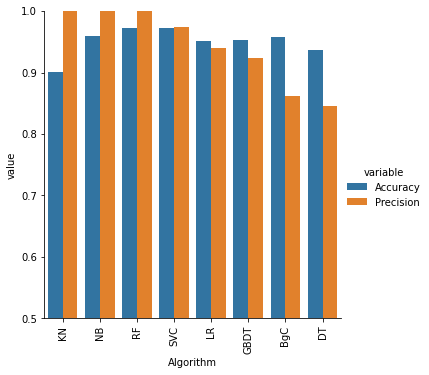

In [77]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
#model improving

In [79]:
#max features
tfidf = TfidfVectorizer(max_features=3000)

In [80]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
gnb.fit(X_train,y_train)
y_predG = gnb.predict(X_test)
print(accuracy_score(y_test,y_predG))
print(confusion_matrix(y_test,y_predG))
print(precision_score(y_test,y_predG))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [83]:
mnb.fit(X_train,y_train)
y_predM = mnb.predict(X_test)
print(accuracy_score(y_test,y_predM))
print(confusion_matrix(y_test,y_predM))
print(precision_score(y_test,y_predM))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [84]:
bnb.fit(X_train,y_train)
y_predB = bnb.predict(X_test)
print(accuracy_score(y_test,y_predB))
print(confusion_matrix(y_test,y_predB))
print(precision_score(y_test,y_predB))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [85]:
accuracy_scores_mf = []
precision_scores_mf = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores_mf.append(current_accuracy)
    precision_scores_mf.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_mf3000':accuracy_scores_mf,'Precision_mf3000':precision_scores_mf}).sort_values('Precision_mf3000',ascending=False)

In [87]:
temp_df

,Algorithm,Accuracy_mf3000,Precision_mf3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
7,GBDT,0.946809,0.919192
6,BgC,0.958414,0.868217
3,DT,0.929400,0.828283


In [88]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_mf3000,Precision_mf3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,SVC,0.972921,0.974138,0.975822,0.974790
4,LR,0.951644,0.940000,0.958414,0.970297
5,GBDT,0.952611,0.923810,0.946809,0.919192
6,BgC,0.958414,0.862595,0.958414,0.868217
7,DT,0.936170,0.846154,0.929400,0.828283


In [89]:
#Although precision of KN and NB has increased after max features=3000, that of RF has decreased
#Accuray of RF without max features is the higher as compared to that of KN and NB in both the cases
#Hence RF without max features would be our model

In [90]:
#setting variables to appropriate values in order to obtain the desired model

In [91]:
tfidf = TfidfVectorizer() #removing max features

In [92]:
X = tfidf.fit_transform(df['transformed_text']).toarray() #updating X with tfidf without max features

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) #splitting with updated X

In [94]:
#using rfc as it is our desired
rfc.fit(X_train,y_train)
y_predRF = rfc.predict(X_test)
print(accuracy_score(y_test,y_predRF))
print(confusion_matrix(y_test,y_predRF))
print(precision_score(y_test,y_predRF))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [95]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))